<link rel="stylesheet" href="reveal.js/css/theme/solarized.css" id="theme">

In [12]:
from IPython.display import Image

# What's new in Python 3.6
#### by Sabine Maennel

# Timeline

## Python 3.6

- was released on December 23, 2016

- work on it began in May 2015

# Resources

## How to find out what's in it?

- The Obvious Source
[docs.python.org](https://docs.python.org/3/whatsnew/3.6.html)

- Ask a Core developer
[Talk by Brett Cannon](https://www.youtube.com/watch?v=hk85RUtQsBI&t=29s)

- Ask the Dictionary guy
[Talk by Raymond Hettinger](https://www.youtube.com/watch?v=p33CVV29OG8&t=29s),

## Complete Resources
- Thomas Nyberg, User Group NYC, "Let's Review the dict Module: Part II: Compact Dicts (The Modern Implementation)"[Slides](https://dl.dropboxusercontent.com/u/3967849/sfmu2/_build/html/index.html))
- Martin Geisler: "Asynchronous I/O" [slides](https://mgeisler.github.io/pyzurich/talks/2016-12-08-asyncio/#1), "The Dictionary Type" [slides](https://mgeisler.github.io/pyzurich/talks/2016-09-01-dict/#1), "Type Hints in Python 3" [slides](https://mgeisler.github.io/pyzurich/talks/2016-04-28-mypy/#1)
- David Beazley: [Python3 Metaprogramming](https://www.youtube.com/watch?v=sPiWg5jSoZI)

# Gossip

## Brett Cannon: "quite the release"

- 16 Python Enhancement Proposals (PEP)

- there has not been as many PEPs in a single release since Python 3.0!

## Raymond Hettinger "3.6 is the best Python ever"

- "I have never said this before about a Python version"

- "You really want it!"

- "It is the first Python 3 worthy of the name, go get it."

# The Details

# Convenient new stuff:

## String interpolation with fstrings
[PEP498](https://www.python.org/dev/peps/pep-0498/)

### Until 3.5: 
two ways of string interpolation
- string substitution with %
- str.format

In [46]:
name = "Sabine"

In [47]:
print("My name is %s." % name) 

My name is Sabine.


In [48]:
print("My name is {}.".format(name))

My name is Sabine.


### New in 3.6: fstrings 

- the f stands for "format"

In [49]:
name = "Sabine"
print(f"My name is {name}.")

My name is Sabine.


- nesting is possible

In [50]:
import decimal
width = 10
precision = 4
value = decimal.Decimal("12.34567")
f"result: {value:{width}.{precision}}"  # nested fields

'result:      12.35'

- Can do everything format can do

### Advantages

- Faster substitution!
- Easier to read!

- "It's just better!" 
- "people, when they start to use this tend to be very, very ... happy!" (Brett Cannon)

## Numeric literals
[PEP515](https://www.python.org/dev/peps/pep-0515/)

### Until Python 3.5 long number were hard to write 
- For 100000000 you had to count your digits

- in real language you use the dot 100.000.000

### Now in Python 3.6 you can use underscore 
- 100_000_000

In [52]:
hundred_million = 100_000_000
hundred_million

100000000

# Important new stuff

## Adding a secrets module
[PEP506](https://www.python.org/dev/peps/pep-0506/), [PEP524](https://www.python.org/dev/peps/pep-0524/)

### until Python 3.5

- os.urandom was used to generate secret keys

### From the Flask documentation

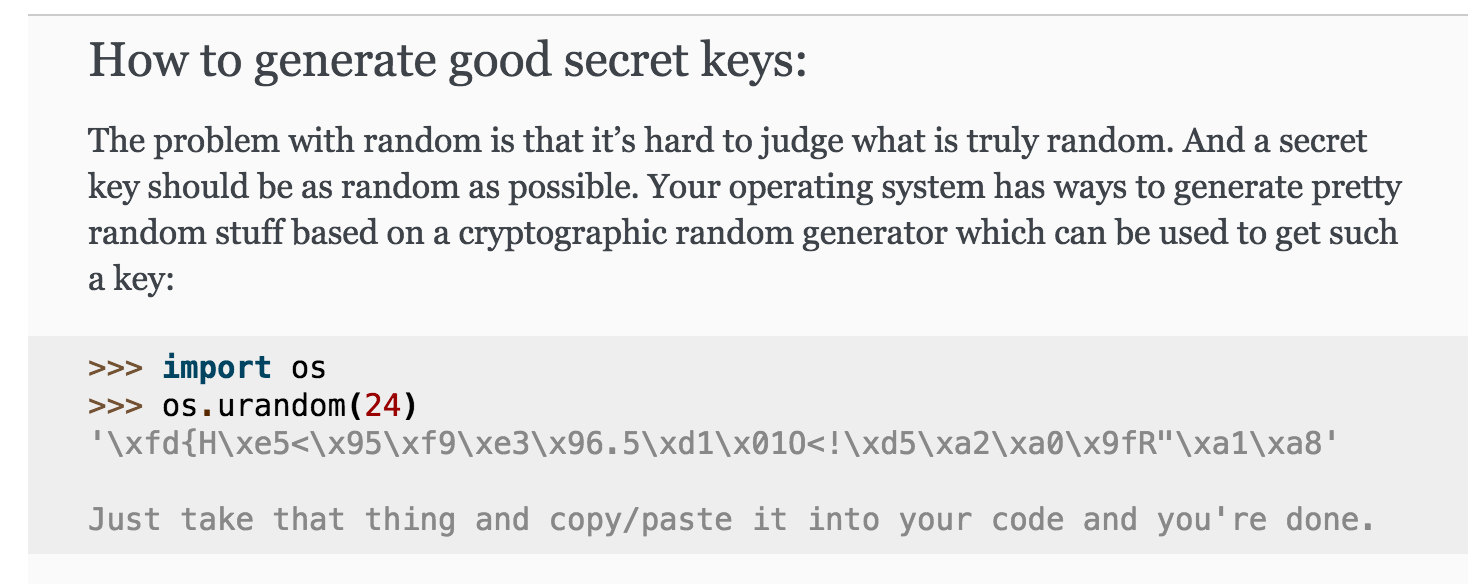

In [53]:
Image(filename="images/flask.png")

In [54]:
import os
os.urandom(24)

b'\xc9\x19C7\xb3\x8e.\xb7f\xd42\xa6\x85t\x86\xe0,\xc16\x19\xfb\x99\xe0n'

- it blocked at times where the operating system did not have enough randomness

### Python 3.6

- the secrets module was added

In [55]:
import secrets
secrets.token_bytes(32)

b'\x16\x1f\xe8H,e\x8ar*\xb1\x8d\x7f\x00U\xc5E\x844\xa0\xc8F\x08\x16\xc49\xcd5\x11\x191\r\xd3'

Always use the secrets module for cryptographical secure identifiers!

### The random module is not meant for secrets

- predictable randomness: use random for modelling and simulation

In [6]:
# always produces the same sequence 9, 0, 6
import random
random.seed(10)
x = random.randint(0, 9)
y = random.randint(0, 9)
z = random.randint(0, 9)
print(x, y, z)

9 0 6


## Completing things that have been started

## Pathlib everywere

### up to Python 3.3

- os module existed for path handling

- paths were provided as strings

In [7]:
import os
path = '/usr/lib'
type(path)

str

In [8]:
os.path.dirname(path)

'/usr'

### In python 3.4: pathlib was added to the standard library

- pathlib library considers paths as objects

- path object does not subclass str

- os could not work with path objects

### since Python 3.6

- you can use path objects everywhere, even in os

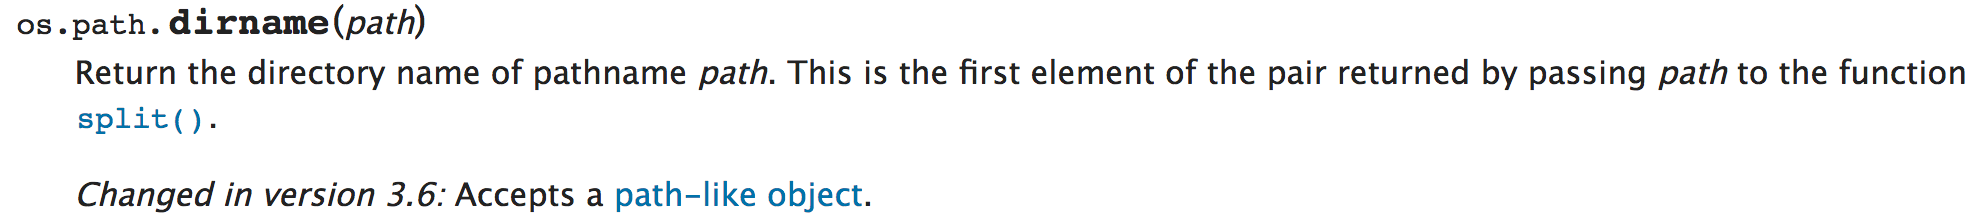

In [13]:
Image(filename="images/path.png")

In [10]:
import pathlib
pathobject = pathlib.Path('/usr/lib')
type(pathobject)

pathlib.PosixPath

In [11]:
os.path.dirname(pathobject)

'/usr'

## Asyncio spread
[PEP525](https://www.python.org/dev/peps/pep-0525/), [PEP530](https://www.python.org/dev/peps/pep-0530/)

### Python 3.5 async/await keywords were added

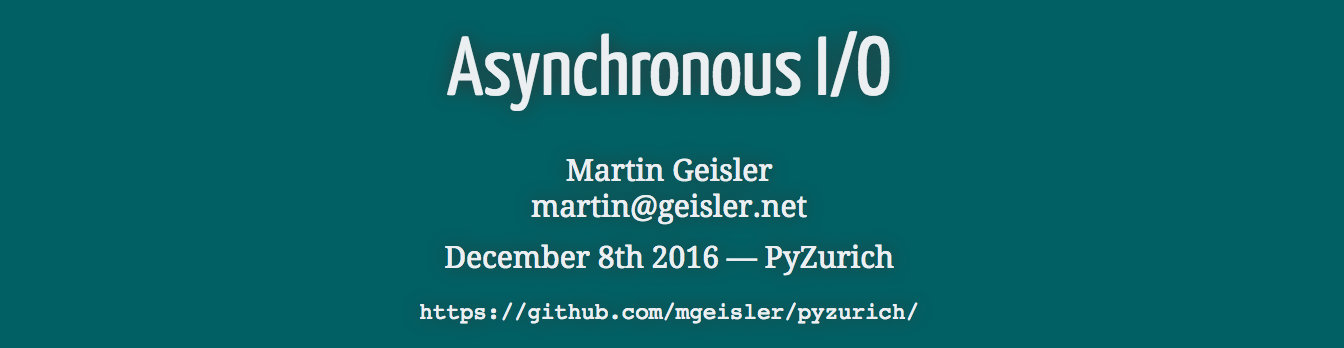

In [14]:
Image(filename="images/asyncio.png")

- they were added as provisional key words

### In Python 3.6 

- async and await remain provisonal keywords (they will turn into reserved key words with Python 3.7)

- support for use in generators and list comprehension is added

#### generator example

In [16]:
async def ticker(delay, to):
    for i in range(to):
        yield i
        await asyncio.sleep(delay)

async def run():
    starttime = datetime.datetime.now()
    print(f"Start at second {starttime.second}")
    async for i in ticker(5, 10):
        outputtime = datetime.datetime.now()
        print(f"output: {i} at second: {outputtime.second}")

In [17]:
import asyncio
import datetime
loop = asyncio.get_event_loop()
try:
    loop.run_until_complete(run())
finally:
    loop.close()

Start at second 53
output: 0 at second: 53
output: 1 at second: 58
output: 2 at second: 3
output: 3 at second: 8
output: 4 at second: 13
output: 5 at second: 18
output: 6 at second: 23
output: 7 at second: 28
output: 8 at second: 33
output: 9 at second: 38


#### List comprehension example

In [1]:
async def async_comprehensions():
    comp_with_async = [i async for i in aiter if i % 2]
    comp_with_await = [await fun() for fun in funcs]

## Type annotations expanded

### Since Python 3.5: 
- Type annotations for functions are possible

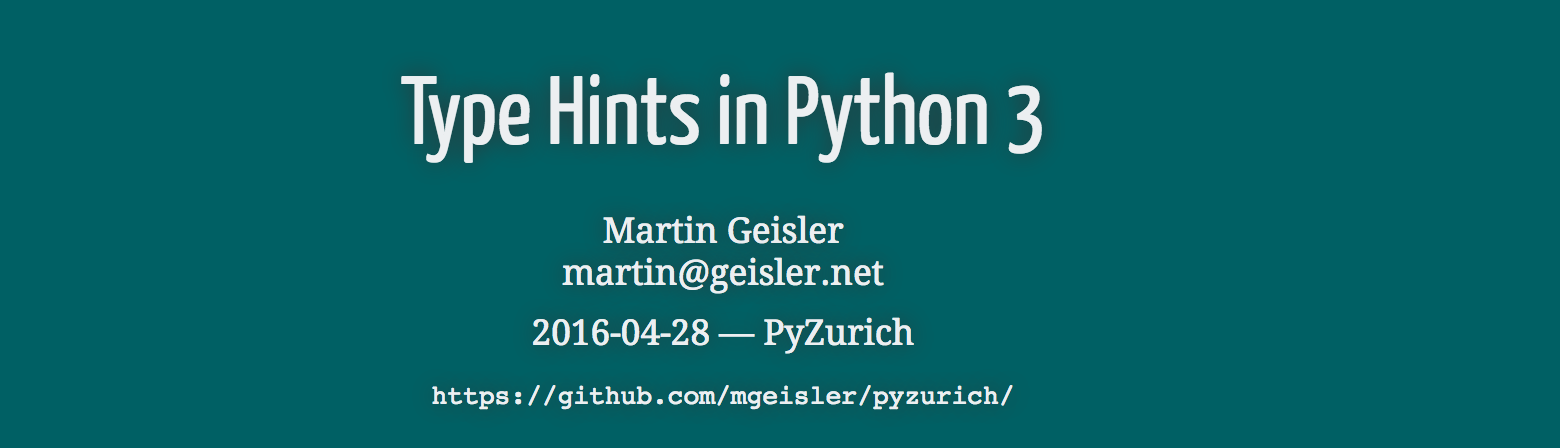

In [15]:
Image(filename="images/Type_hints.png")

In [18]:
def add(x: int, y:int):
    return x + y

add(3,4)

7

- annotations can be seen in __annotations__

In [19]:
add.__annotations__

{'x': int, 'y': int}

- no automatic type checking happens

### New in Python 3.6: 
Type annotations are now possible everywhere!

- typing module is no longer provisional

In [20]:
from typing import List, Dict
primes: List[int] = []

captain: str  # Note: no initial value!

class Starship:
    stats: Dict[str, int] = {}
        
s = Starship()
s.__annotations__

{'stats': typing.Dict[str, int]}

### Annotations are now also possible for

- local variables

- for class and instance variables

### Tools that will use the new syntax

- mypy, pytype

# CPython Improvements

## New dict implementation

### What it means

- This is something big! 

- because: dictionaries are everywhere in Python

- The new dictionary is ordered, but we are asked to not rely on that it is ordered yet

## Except in two cases..

### with keyword arguments of functions 
[PEP468](https://www.python.org/dev/peps/pep-0468/)

- now they come out exactly in the order, that they have been put in:

In [21]:
def orderpreserved(**kwargs):
     print(list(kwargs.keys()))
    
orderpreserved(c=1,b=2,a=3)    

['c', 'b', 'a']


### With class attributes
[PEP520](https://www.python.org/dev/peps/pep-0520/)

In [22]:
class OrderPreserved:
    c = 1
    b = 2
    def a(self):
        pass
    
list(OrderPreserved.__dict__.keys())    

['__module__', 'c', 'b', 'a', '__dict__', '__weakref__', '__doc__']

## Everywhere else: (Brett Cannon)

- "We are making no garanties that dictionaries will be ordered"

- "If they happen to be ordered consider it pure luck"

## But: (Raymond Hettinger)
- from databases to hashtables and now back to databases

Version    | DictSize    | Dict Ordering                
-----------|-------------|------------------------------
Python 2.7 | 280,280,280 | Scrambled (predictable) 
Python 3.5 | 196,196,196 | Randomized (unpredictable): key-sharing dictionary
Python 3.6 | 112,112,112 | Ordered

### now dictionaries are
- small
- ordered

### Dictionaries in Python 3.5

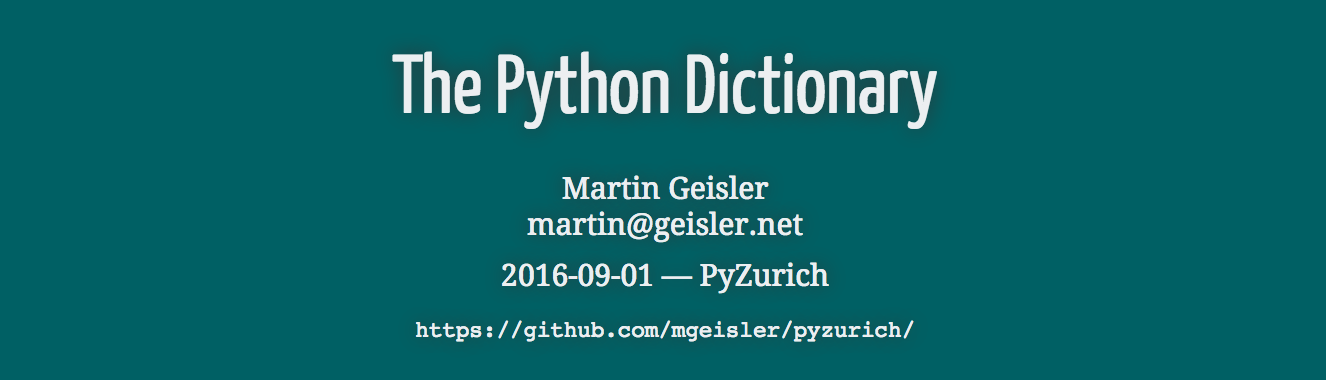

In [23]:
Image(filename="images/pydict.png")

### Dictionaries were stored via hashes of their keys

- the keys were hashed

- the end of the hashes indicated where the keys can be found

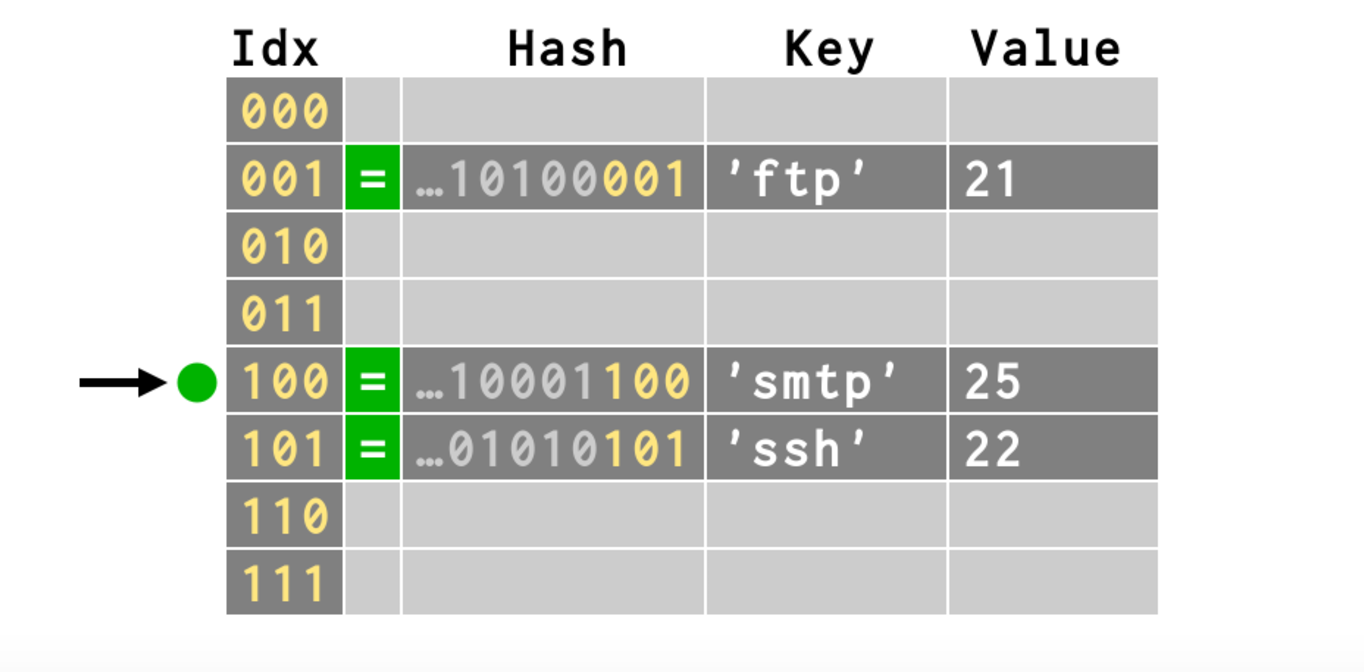

In [36]:
Image(filename="images/hashed_dicts.png")

- to avoid collisions with the hashends: the lists kept sparse!

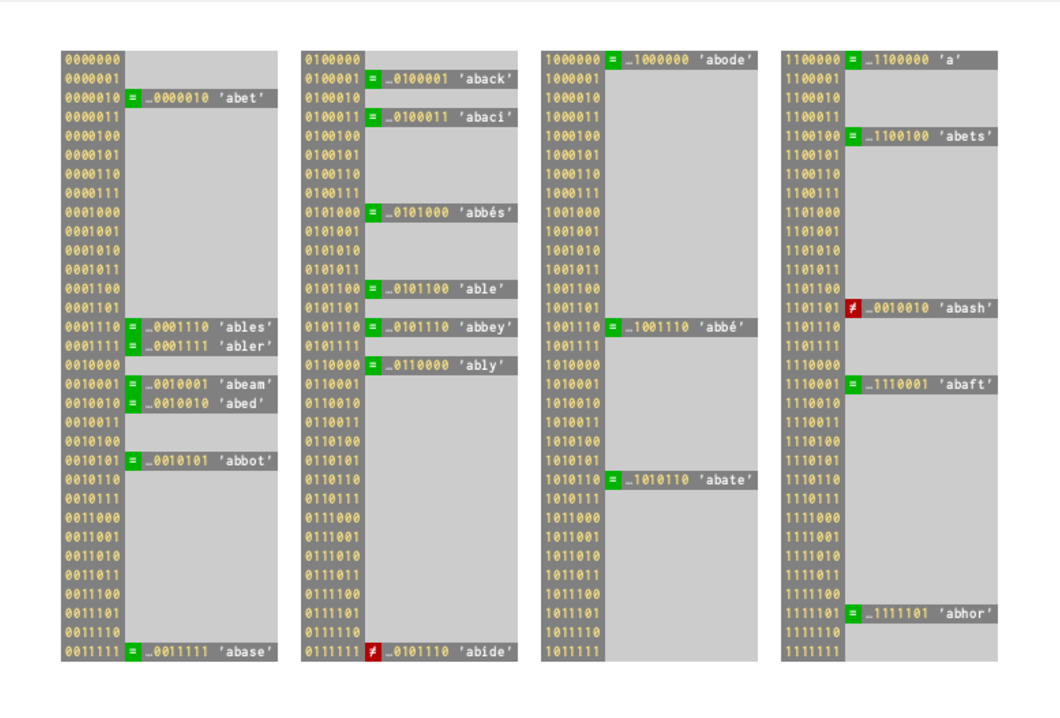

In [25]:
Image(filename="images/old_dict2.png")

### Disadvantages

- lots of unused space

- Raymond Hettinger: "There must be a better way" 

- This started 4 years ago: first implementation in PyPy, got serious after Java did something similar

### Dictionaries in Python 3.6

- compact

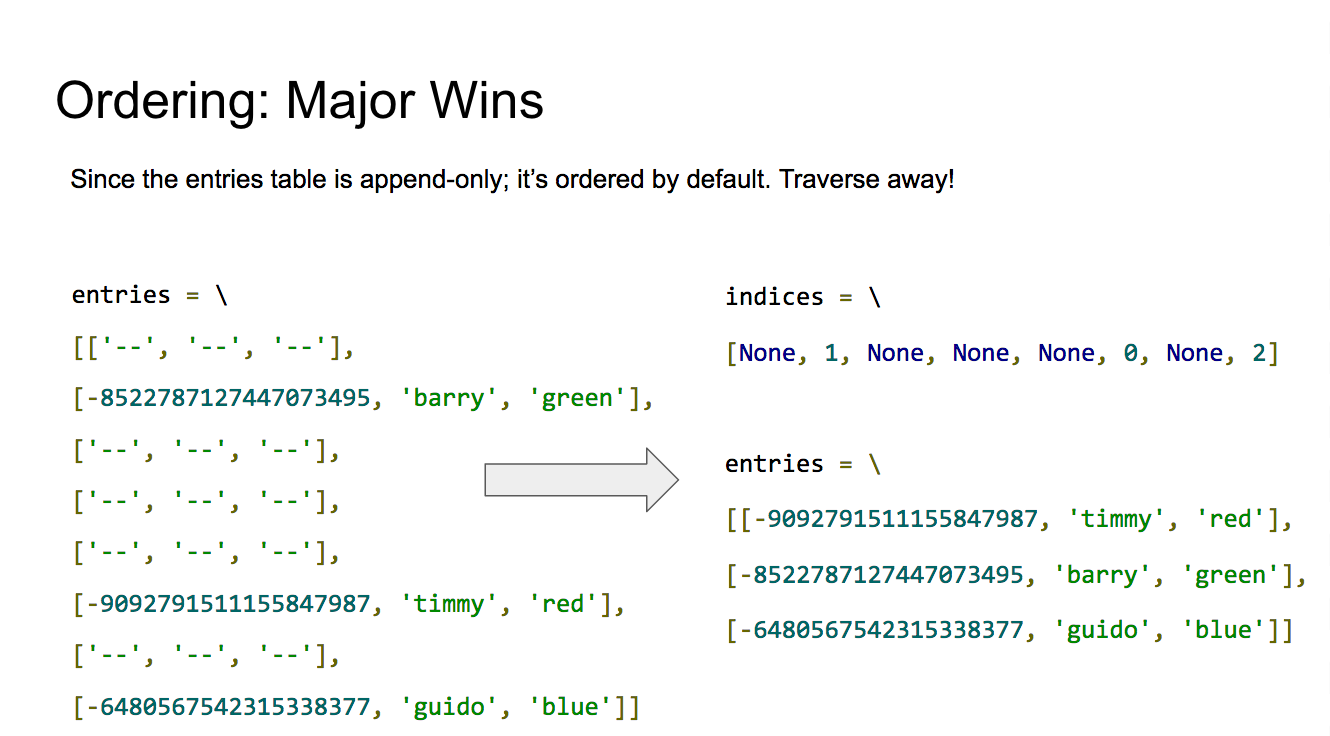

In [26]:
Image(filename="images/new_dict.png")

```
entries = \
[[--, '--', --],
 [..001, 'ftp', 21],
 [--, '--', --],
 [--, '--', --],
 [..100, 'smtp', 25],
 [..101, 'ssh', 22],
 [--, '--', --],
 [--, '--', --],
]
```

- hash ends with ..100 
- => this is a binary **4**
- => look in hashtable list at **index 4** 
- => find **'ssh' key and 22 value**

```
entries = \
[[..100, 'smtp', 25],
 [..001, 'ftp', 21],
 [..101, 'ssh', 22],
]
indices = [None, 1, None, None, 0, 2, None, None]
```

#### - hash ends with ..100 
- => this is a binary **4**
- => look in index list at **index 4** 
- => find **0** 
- => look at entry list at **index 0**
- => find **'ssh' key and 22 value**

- entries are dense and ordered

- an index keeps track of the position of the hashes

### The reality is more complicated

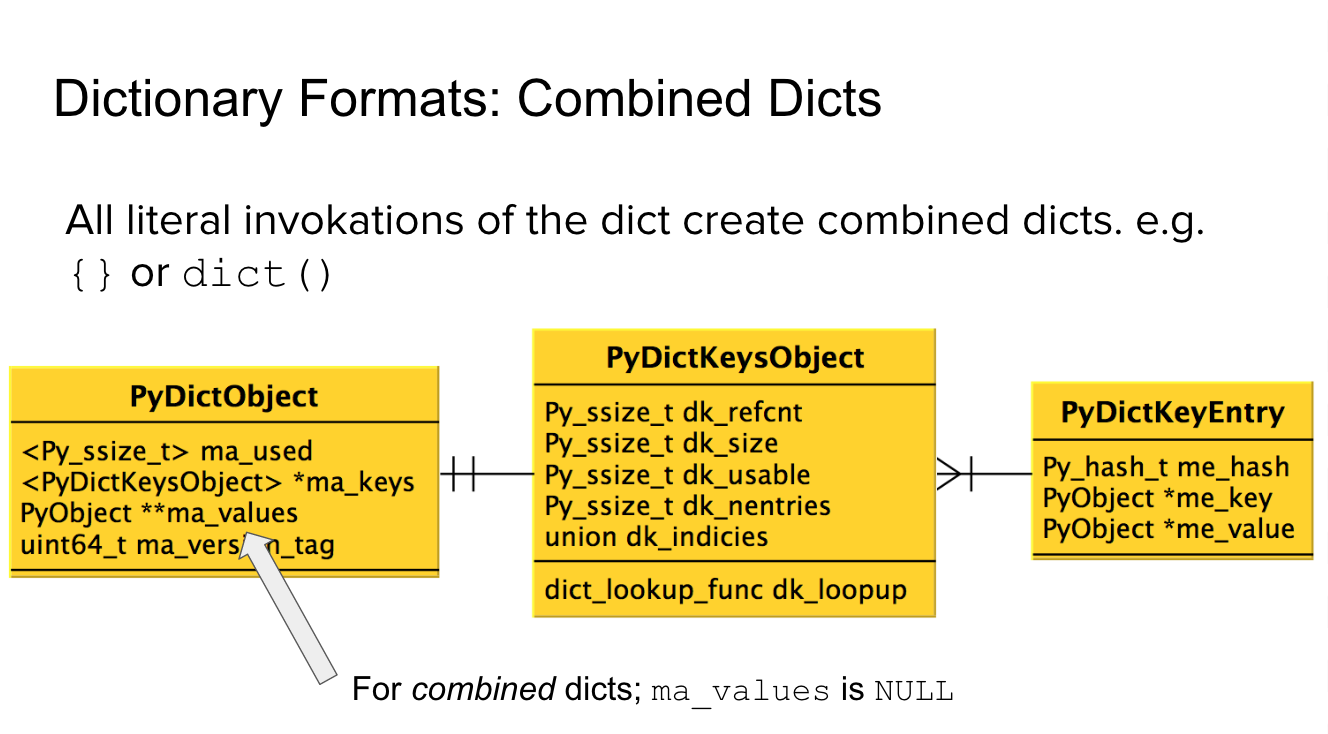

In [27]:
Image(filename="images/combined_dict.png")

### Dicts in Python 3.6

- have indexes and are compact

- share keys (for example instance dictionaries)

- have versioning: [PEP509](https://www.python.org/dev/peps/pep-0509/)

# Other significant improvements


## Simpler Customization of class creation
[PEP487](https://www.python.org/dev/peps/pep-0487/)

### meta programming has magic, that comes at a price

-  "Who here has written a meta class? Who here found it really simple?" (Brett Cannon)

### Question on stack Overflow

- Why did the Python designers decide that subclasses' __init__() methods don't automatically call the __init__() methods of their superclasses, as in some other languages?

### Up to python 3.5

- superclass init had to be invoked by the subclass

In [28]:
class Superclass(object):
    def __init__(self):
        print('Do something in the Superclass')

class Subclass(Superclass):
    def __init__(self):
        super().__init__()
        print('Do something in the Subclass')
        
Subclass()        

Do something in the Superclass
Do something in the Subclass


### It was not easy to change the DNA of a subclass

- Only meta programming could fix that

- but meta programming comes at a price

- you can only inherit from one metaclass

### In Python 3.6

- there is a new hook __subclass_init__ that is invoked automatically

- you can even pass arguments into the subclass creation

In [40]:
class Superclass(object):
    def __init_subclass__(cls, whom, **kwargs):
        print(f'Do something with {whom}')
        cls.hello = lambda: print(f"Hello from {whom}!")

class MySubclass(Superclass, whom="MySubclass"):
    pass  
            
MySubclass.hello() 

Do something with MySubclass
Hello from MySubclass!


### Metaprograming Example by David Beazley

- "With meta-Programming you are changing the DNA of a whole class hierarchy"

### can you do that with the subclass hook?

- his example: classes with fields (imaging many similar ones)

In [30]:
class Stock:
    def __init__(self, name, shares, price):
        self.name = name
        self.shares = shares
        self.price = price
        
s = Stock('GOOG', 10, 25.50)    
print(s.name, s.shares, s.price)                

GOOG 10 25.5


- make it DRY: with a superclass

In [31]:
class Structure:
    _fields = []
    def __init__(self, *args):
        for name, val in zip(self._fields, args):
            setattr(self, name, val)
    
class Stock(Structure):
    _fields = ['name', 'shares', 'price']
    
s = Stock('GOOG', 10, 25.50)    
print(s.name, s.shares, s.price)

GOOG 10 25.5


This trick, that messed up the class: no signature, no keyword arguments, no help!

- use signature function to get checking of Arguments

In [32]:
from inspect import Parameter, Signature
def make_signature(names):
    return Signature(
        Parameter(name, Parameter.POSITIONAL_OR_KEYWORD) for name in names)

- now the Stock class looks weird

In [33]:
class Structure:
    __signature__ = make_signature([])
    def __init__(self, *args, **kwargs):
        bound = self.__signature__.bind(*args, **kwargs)
        for name, val in bound.arguments.items():
            setattr(self, name, val)
    
class Stock(Structure):
    __signature__ = make_signature(['name', 'shares', 'price'])
    
s = Stock('GOOG', 10, 25.50)    
print(s.name, s.shares, s.price)  

GOOG 10 25.5


- hiding of the weird useful stuff through metaclass

In [34]:
class StructMeta(type):
    def __new__(cls, name, bases, clsdict):
        clsobj = super().__new__(cls, name, bases, clsdict)
        sig = make_signature(clsobj._fields)
        setattr(clsobj, '__signature__', sig)
        return clsobj
    
class Structure(metaclass=StructMeta):
    _fields = []
    def __init__(self, *args, **kwargs):
        bound = self.__signature__.bind(*args, **kwargs)      
        for name, val in bound.arguments.items():
            setattr(self, name, val) 
      
class Stock(Structure):
    _fields = ['name', 'shares', 'price']
    
s = Stock('GOOG', 10, 25.50)    
print(s.name, s.shares, s.price)    

GOOG 10 25.5


### in python 3.6 with subclass hook

- can acchieve this with a subclass hook?

In [35]:
class Structure:
    def __init_subclass__(cls, _fields):  
        sig = make_signature(_fields)
        setattr(cls, '__signature__', sig)
                  
    def __init__(self, *args, **kwargs):
        bound = self.__signature__.bind(*args, **kwargs) 
        for name, val in bound.arguments.items():
            setattr(self, name, val)       
     
class Stock(Structure, _fields=['name', 'shares', 'price']):
    pass
    
s = Stock('GOOG', 10, 25.50)    
print(s.name, s.shares, s.price)    

GOOG 10 25.5


- you can also use it with key word arguments

In [47]:
s = Stock(name='MICROSOFT', price=100, shares=20)
print(s.name, s.shares, s.price)   

MICROSOFT 20 100


- it also checks for errors

The tutorial is a lot longer and has a lot more magic with descriptors

- The same PEP487 introduces an additional hook for descriptors: 
```
__set_name__
```

In [50]:
class Descriptor:
    def __init__(self, minimum, maximum):
        self.minimum = minimum
        self.maximum = maximum

    def __get__(self, instance, owner):
        return instance.__dict__[self.key]

    def __set__(self, instance, value):
        if self.minimum < value < self.maximum:
            instance.__dict__[self.key] = value
        else:
            raise ValueError("value not in range")

    def __set_name__(self, owner, name):
        self.key = name

## Handling Local Time Disambiguations
[PEP495](https://www.python.org/dev/peps/pep-0495/)

- datetime got a new keyword-attribute 'fold'

- default: 0, it can be set to 1, when the time is passed the second time

### When Summertime stops

- On 30.10.2016 at 3am the clock is turned back to 2 am.

- 2:30 am is passed in CEST: Central European Summer Time

- then at 3 am the clock ist turned back to 2 am CET: Central European Time

- 2:30 am is now passed in CET a second time

### In Python 3.6 with the fold

- both times now have a distinct representation

In [2]:
import datetime
dt1 = datetime.datetime(2016, 10, 30, 2, 30)
dt1.astimezone().strftime('%D %T %Z%z')

'10/30/16 02:30:00 CEST+0200'

In [3]:
dt2 = datetime.datetime(2016, 10, 30, 2, 30, fold=1)
dt2.astimezone().strftime('%D %T %Z%z')

'10/30/16 02:30:00 CET+0100'

- Is this a bug?

In [4]:
dt2 - dt1

datetime.timedelta(0)

- "you get to own the dot" (David Beazley)

In [ ]:
class Descriptor:
    def __init__(self, name=None):
        self.name = name
    def __get__(self, instance, cls):
        print("Get", self.name)
        if instance is None:
            return self
        else:
            return instance.__dict__[self.name]
    def __set__(self, instance, value):
        print("Get", self.name, value)
        instance.__dict__[self.name] = value
    def __delete__(self, instance):
        print("Delete", self.name)
        del instance.__dict__[self.name]       

owns the dot for a single attribute

In [ ]:
class Stock(Structure, _fields=['name', 'shares', 'price']):
    shares = Descriptor('shares')
    
s = Stock('GOOG', 10, 25.50)       

In [ ]:
s.shares

You don't need the get:

In [ ]:
class Descriptor:
    def __init__(self, name=None):
        self.name = name
    def __set__(self, instance, value):
        print("Get", self.name, value)
        instance.__dict__[self.name] = value
    def __delete__(self, instance):
        print("Delete", self.name)
        del instance.__dict__[self.name]

In [ ]:
class IntField:
    def __get__(self, instance, owner):
        return instance.__dict__[self.name]

    def __set__(self, instance, value):
        if not isinstance(value, int):
            raise ValueError(f'expecting integer in {self.name}')
        instance.__dict__[self.name] = value

    # this is the new initializer:
    def __set_name__(self, owner, name):
        self.name = name

class Model:
    int_field = IntField()

# Windows improvements

## Windows default encoding changed to UTF8
[PEP528](https://www.python.org/dev/peps/pep-0528/), [PEP 529](https://www.python.org/dev/peps/pep-0529/)

### now REPL uses UTF8
(Read-Eval-Print-Loop)

- smoother windows experience

- all unicode characters can be printed in windows, byte-based paths are accepted

# There is always more ...
[Python 3.6 Change List](https://docs.python.org/3/whatsnew/3.6.html)

## Adding a framing API to CPython
- [PEP523](https://www.python.org/dev/peps/pep-0523/)

- Interesting if you write a JIT (just in time), Debugger or Profiler

- "This means PyEval_EvalFrameEx()is now plugable" (Brett Cannon)

## New Evironment variable PYTHONMALLOC

- used for Memory Allocation

- [Start](file:///Users/sabinemaennel/python36/python3.6.slides.html#/1)
- [The Details](file:///Users/sabinemaennel/python36/python3.6.slides.html#/5)